In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import os
os.chdir('../data')

In [7]:
df = pd.read_csv('customer.csv')

In [8]:
df.head() 

Account Balance  Monthly Spending  Lifetime Value   Last Purchase Amount  \
0      1636.670614        817.988525     2565.995189             358.347163   
1      1013.402760        577.587332     2644.141273             280.428203   
2      1300.035501        820.518697     2025.854469             525.562292   
3      1059.347542       1066.866418      612.000041             480.827789   
4      1018.340526       1313.679056      950.622661             724.742174   

    Discount Received   Annual Revenue  Total Purchases  \
0          550.417491      1618.870897      2147.641254   
1         1161.873391      2084.107872       853.404981   
2          922.206261      2552.355407       818.676686   
3          419.467495       685.666983       852.867810   
4          843.065903      1370.554164       905.469453   

   Average Transaction Value   Account Age  Customer Satisfaction Score  \
0                 330.727893   1494.878631                   845.136088   
1                 447.157619   1193.032521                   861.081809   
2                 845.491492   1968.367513                  1647.186291   
3                 341.664784   1154.391368                  1450.935357   
4                 658.118202    539.459350                  1899.850792   

   Target Class  
0             0  
1             1  
2             1  
3             0  
4             0

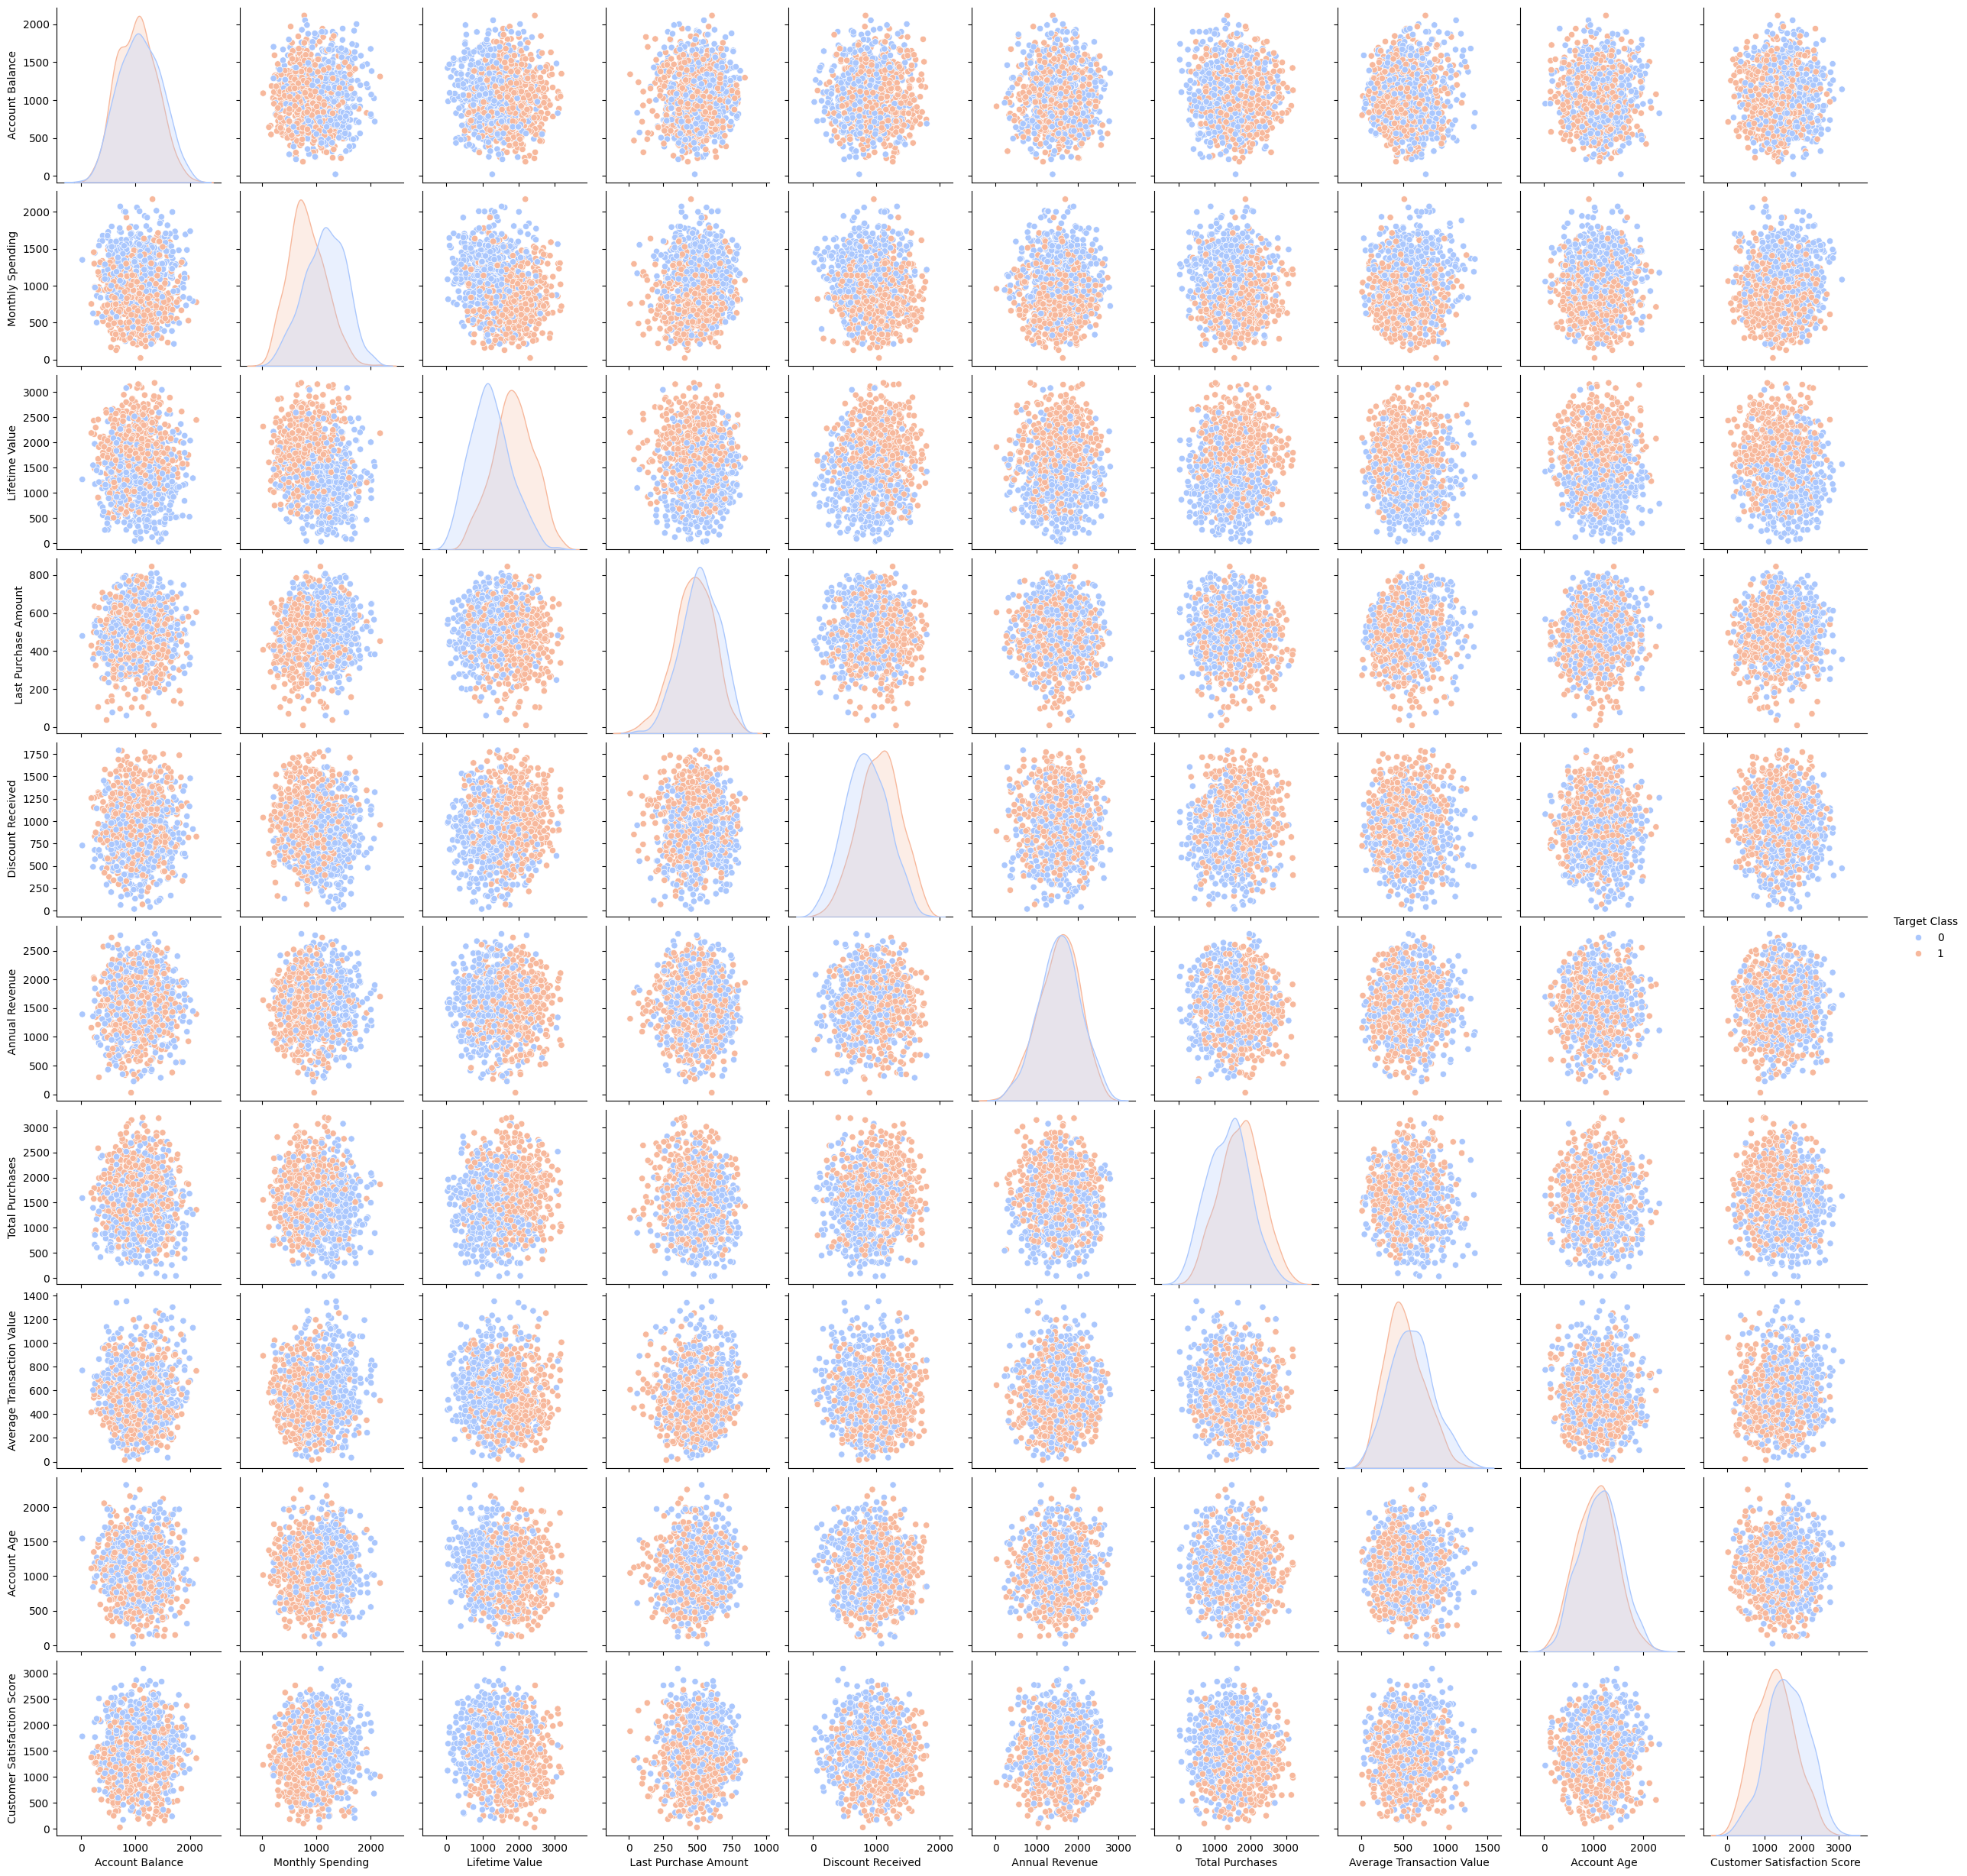

In [10]:
sns.pairplot(df,hue='Target Class',palette='coolwarm')

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop('Target Class',axis=1))

StandardScaler()

In [14]:
scaled_features = scaler.transform(df.drop('Target Class',axis=1))

In [15]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

Account Balance  Monthly Spending  Lifetime Value   Last Purchase Amount  \
0         1.568522         -0.443435        1.619808              -0.958255   
1        -0.112376         -1.056574        1.741918              -1.504220   
2         0.660647         -0.436981        0.775793               0.213394   
3         0.011533          0.191324       -1.433473              -0.100053   
4        -0.099059          0.820815       -0.904346               1.609015   

    Discount Received   Annual Revenue  Total Purchases  \
0           -1.128481         0.138336         0.980493   
1            0.640009         1.081552        -1.182663   
2           -0.053171         2.030872        -1.240707   
3           -1.507223        -1.753632        -1.183561   
4           -0.282065        -0.365099        -1.095644   

   Average Transaction Value   Account Age  Customer Satisfaction Score  
0                  -0.932794      1.008313                    -1.069627  
1                  -0.461864      0.258321                    -1.041546  
2                   1.149298      2.184784                     0.342811  
3                  -0.888557      0.162310                    -0.002793  
4                   0.391419     -1.365603                     0.787762

### Train Test Split


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Target Class'],
                                                    test_size=0.30)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#KNN model instance with n_neighbors=1

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations


In [26]:
pred = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,pred))

[[105  56]
 [ 27 112]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72       161
           1       0.67      0.81      0.73       139

    accuracy                           0.72       300
   macro avg       0.73      0.73      0.72       300
weighted avg       0.74      0.72      0.72       300



### Choosing a K Value
### Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list

In [31]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

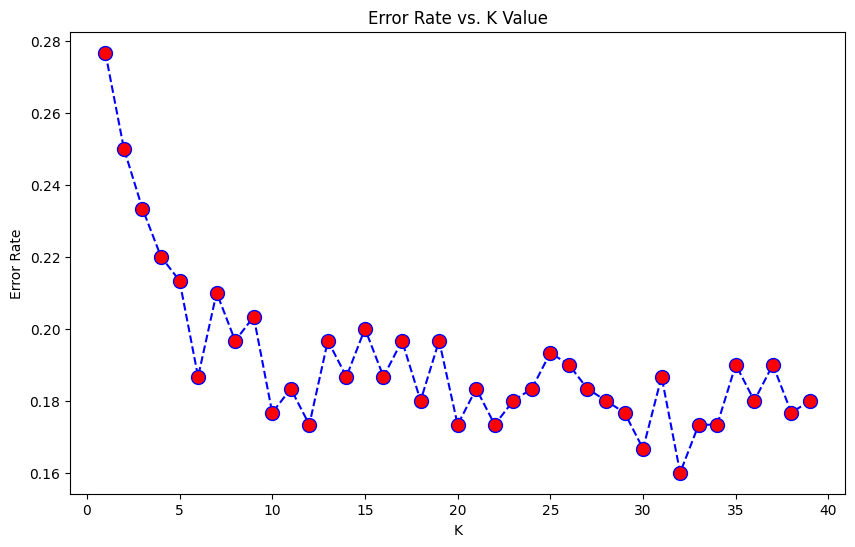

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
#Retrain your model with the best K value
# K = 32
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=32')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=32


[[127  34]
 [ 14 125]]


              precision    recall  f1-score   support

           0       0.90      0.79      0.84       161
           1       0.79      0.90      0.84       139

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.84      0.84       300

